## Assignment 1a: Machine Learning Methods

### \yuqing chen \a1841612

#### How can we use data analytics to predict energy usage for this house?

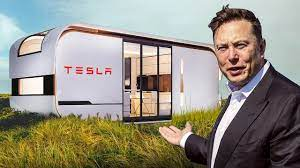

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [3]:
import pandas as pd

file_path = 'energydata_complete.csv'
df = pd.read_csv(file_path)

### 2. Analyse and visualise the data 
1) 分析和可视化（最多 20 项）


Identify data dependencies that might be useful for this task and visualise those dependencies using suitable techniques and charts.

Use this analysis to select suitable processing and prediction models for data preprocessing and experimentation and justify your selection.

Include the charts and diagrams together with the code in Jupyter Notebook.

Make sure your charts are of good quality and useful, there is no point to make a chart or a table, if it is not referred to in your discussion. 

分析数据并将其可视化。

确定可能对本任务有用的数据依赖关系，并使用适当的技术和图表将这些依赖关系可视化。

利用该分析为数据预处理和实验选择合适的处理和预测模型，并说明选择的理由。

在 Jupyter Notebook 中包含图表和代码。

请确保您的图表质量上乘且有用，如果您在讨论中没有提到图表或表格，那么制作图表或表格就没有意义了。

In [4]:
# Display the first few rows of data from the dataset
print(df.head())

               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11/01/2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11/01/2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11/01/2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11/01/2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11/01/2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  


In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_75081/3880521508.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(df['date'], df['T_out'], linestyle='solid', marker = 'None')


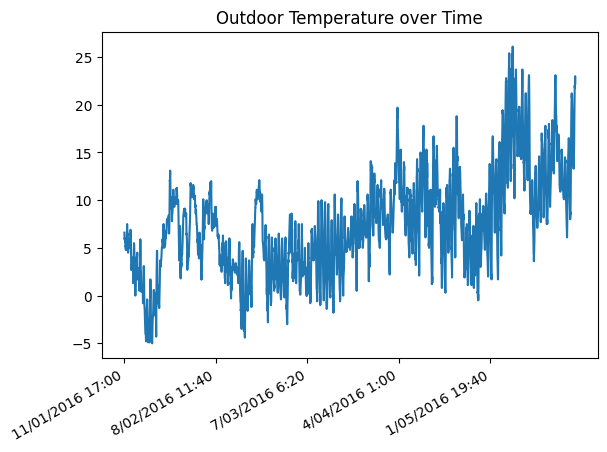

In [17]:
# Visualise the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Outdoor Temperature over Time')
plt.plot_date(df['date'], df['T_out'], linestyle='solid', marker = 'None')
plt.gcf().autofmt_xdate()

plt.xticks(df['date'][::4000]) # Display a date every 4000 data points
plt.show()

### 3. Pre-process the data

使用适用的处理技术，例如缩放、转换和缺失值插补。

数据预处理应与您的分析一致，例如，如果您使用缺失值插补，这也应在分析中显示。

### 4. Implement, train and test prediction models

实施并训练至少两个预测模型。

您可以在作业中使用论文和论文代码。如果您使用论文中的代码 下载论文，清楚地识别代码的哪一部分被使用、在哪里使用，以及它如何适应您的任务。您还可以使用常见的 Python 库。除了讲座、研讨会和上述论文中的代码之外，请勿使用任何其他代码。

使用合适的训练/测试方法，例如数据训练/测试分割或交叉验证，并证明您的决定是正确的。

使用合适的模型性能指标并证明您的选择是合理的。

使用机器学习方法测试模型，并包括所有候选模型的结果。

### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

比较所有候选模型的结果，选择最佳模型，证明您的选择的合理性并讨论结果。

以合适的图表和表格的形式显示所有模型的结果。

选择性能最佳的模型，显示该模型的最终结果并证明您的选择是合理的。

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

### 7. References